# Instalación de librerias 

In [92]:
!pip install tensorflow pandas numpy matplotlib seaborn scikit-learn


# Lectura y limpieza de Datos

In [ ]:
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM, GRU
sns.set_style('darkgrid')

In [2]:
np.random.seed(1234)  
PYTHONHASHSEED = 0

In [3]:

train_df = pd.read_csv('train_FD001.txt', sep=" ", header=None)

test_df = pd.read_csv('test_FD001.txt', sep=" ", header=None)

train_df.head(100)

0    1       2       3      4       5       6        7        8      9   \
0    1    1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60  14.62   
1    1    2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14  14.62   
2    1    3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20  14.62   
3    1    4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87  14.62   
4    1    5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22  14.62   
..  ..  ...     ...     ...    ...     ...     ...      ...      ...    ...   
95   1   96 -0.0034  0.0001  100.0  518.67  642.19  1584.07  1395.16  14.62   
96   1   97  0.0035 -0.0003  100.0  518.67  642.07  1595.77  1407.81  14.62   
97   1   98  0.0006  0.0004  100.0  518.67  642.00  1591.11  1404.56  14.62   
98   1   99 -0.0005 -0.0000  100.0  518.67  642.46  1592.73  1406.13  14.62   
99   1  100 -0.0021 -0.0003  100.0  518.67  642.22  1589.63  1411.35  14.62   

    ...       18      19    20   21    22     23     24       25  26  27  
0   ...  8138.62  8.4195  0.03  392  2388  100.0  39.06  23.4190 NaN NaN  
1   ...  8131.49  8.4318  0.03  392  2388  100.0  39.00  23.4236 NaN NaN  
2   ...  8133.23  8.4178  0.03  390  2388  100.0  38.95  23.3442 NaN NaN  
3   ...  8133.83  8.3682  0.03  392  2388  100.0  38.88  23.3739 NaN NaN  
4   ...  8133.80  8.4294  0.03  393  2388  100.0  38.90  23.4044 NaN NaN  
..  ...      ...     ...   ...  ...   ...    ...    ...      ...  ..  ..  
95  ...  8130.69  8.4311  0.03  392  2388  100.0  38.88  23.3255 NaN NaN  
96  ...  8128.74  8.4105  0.03  392  2388  100.0  39.01  23.2963 NaN NaN  
97  ...  8127.89  8.4012  0.03  391  2388  100.0  38.96  23.2554 NaN NaN  
98  ...  8131.77  8.4481  0.03  393  2388  100.0  38.82  23.2323 NaN NaN  
99  ...  8132.49  8.4241  0.03  392  2388  100.0  38.93  23.4090 NaN NaN  

[100 rows x 28 columns]

In [4]:

train_df.dropna(axis=1, inplace=True)
test_df.dropna(axis=1, inplace=True)

In [5]:
print(len(train_df))
print(len(test_df))

20631
13096


In [6]:
cols_names = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']

train_df.columns = cols_names
test_df.columns = cols_names

train_df.head(2)

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   

      s5  ...     s12      s13      s14     s15   s16  s17   s18    s19  \
0  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388  100.0   
1  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388  100.0   

     s20      s21  
0  39.06  23.4190  
1  39.00  23.4236  

[2 rows x 26 columns]

In [7]:
test_df.head(2)

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1    0.0023    0.0003     100.0  518.67  643.02  1585.29  1398.21   
1   1      2   -0.0027   -0.0003     100.0  518.67  641.71  1588.45  1395.42   

      s5  ...     s12      s13      s14     s15   s16  s17   s18    s19  \
0  14.62  ...  521.72  2388.03  8125.55  8.4052  0.03  392  2388  100.0   
1  14.62  ...  522.16  2388.06  8139.62  8.3803  0.03  393  2388  100.0   

     s20      s21  
0  38.86  23.3735  
1  39.02  23.3916  

[2 rows x 26 columns]

In [8]:
truth_df = pd.read_csv('RUL_FD001.txt', sep=" ", header=None)
truth_df.head()

0   1
0  112 NaN
1   98 NaN
2   69 NaN
3   82 NaN
4   91 NaN

In [9]:
truth_df.dropna(axis=1, inplace=True)
truth_df.head()

0
0  112
1   98
2   69
3   82
4   91

# Preparación y normalización de datos

In [10]:
train_df.sort_values(['id','cycle'], inplace=True)
test_df.sort_values(['id','cycle'], inplace=True)

### Agregar num max de ciclos

In [11]:
rul = pd.DataFrame(train_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
train_df = train_df.merge(rul, on=['id'], how='left')
train_df['RUL'] = train_df['max'] - train_df['cycle']
train_df[['id','cycle','max','RUL']].head()

id  cycle  max  RUL
0   1      1  192  191
1   1      2  192  190
2   1      3  192  189
3   1      4  192  188
4   1      5  192  187

In [12]:
train_df.drop('max', axis=1, inplace=True)

In [13]:
w1 = 30
train_df['failure_within_w1'] = np.where(train_df['RUL'] <= w1, 1, 0 )

In [14]:
train_df['cycle_norm'] = train_df['cycle']

cols_normalize = train_df.columns.difference(['id','cycle','RUL','failure_within_w1'])

min_max_scaler = preprocessing.MinMaxScaler()
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train_df[cols_normalize]), 
                             columns=cols_normalize, 
                             index=train_df.index)
join_df = train_df[['id','cycle','RUL','failure_within_w1']].join(norm_train_df)
train_df = join_df.reindex(columns = train_df.columns)

train_df.head()

id  cycle  setting1  setting2  setting3   s1        s2        s3        s4  \
0   1      1  0.459770  0.166667       0.0  0.0  0.183735  0.406802  0.309757   
1   1      2  0.609195  0.250000       0.0  0.0  0.283133  0.453019  0.352633   
2   1      3  0.252874  0.750000       0.0  0.0  0.343373  0.369523  0.370527   
3   1      4  0.540230  0.500000       0.0  0.0  0.343373  0.256159  0.331195   
4   1      5  0.390805  0.333333       0.0  0.0  0.349398  0.257467  0.404625   

    s5  ...       s15  s16       s17  s18  s19       s20       s21  RUL  \
0  0.0  ...  0.363986  0.0  0.333333  0.0  0.0  0.713178  0.724662  191   
1  0.0  ...  0.411312  0.0  0.333333  0.0  0.0  0.666667  0.731014  190   
2  0.0  ...  0.357445  0.0  0.166667  0.0  0.0  0.627907  0.621375  189   
3  0.0  ...  0.166603  0.0  0.333333  0.0  0.0  0.573643  0.662386  188   
4  0.0  ...  0.402078  0.0  0.416667  0.0  0.0  0.589147  0.704502  187   

   failure_within_w1  cycle_norm  
0                  0     0.00000  
1                  0     0.00277  
2                  0     0.00554  
3                  0     0.00831  
4                  0     0.01108  

[5 rows x 29 columns]

### Normalizar valores entre 0 y 1

In [91]:

test_df['cycle_norm'] = test_df['cycle']

norm_test_df = pd.DataFrame(min_max_scaler.transform(test_df[cols_normalize]), 
                            columns=cols_normalize, 
                            index=test_df.index)
test_join_df = test_df[test_df.columns.difference(cols_normalize)].join(norm_test_df)
test_df = test_join_df.reindex(columns = test_df.columns)
test_df = test_df.reset_index(drop=True)

In [16]:

rul = pd.DataFrame(test_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
truth_df.columns = ['additional_rul']
truth_df['id'] = truth_df.index + 1
truth_df['max'] = rul['max'] + truth_df['additional_rul']
truth_df.drop('additional_rul', axis=1, inplace=True)
test_df = test_df.merge(truth_df, on=['id'], how='left')
test_df['RUL'] = test_df['max'] - test_df['cycle']
test_df.drop('max', axis=1, inplace=True)

# Asignar 0 a las turbinas con fallo, 1 a las que no fallaron
test_df['failure_within_w1'] = np.where(test_df['RUL'] <= w1, 1, 0 )
test_df.head()

id  cycle  setting1  setting2  setting3   s1        s2        s3        s4  \
0   1      1  0.632184  0.750000       0.0  0.0  0.545181  0.310661  0.269413   
1   1      2  0.344828  0.250000       0.0  0.0  0.150602  0.379551  0.222316   
2   1      3  0.517241  0.583333       0.0  0.0  0.376506  0.346632  0.322248   
3   1      4  0.741379  0.500000       0.0  0.0  0.370482  0.285154  0.408001   
4   1      5  0.580460  0.500000       0.0  0.0  0.391566  0.352082  0.332039   

    s5  ...       s15  s16       s17  s18  s19       s20       s21  \
0  0.0  ...  0.308965  0.0  0.333333  0.0  0.0  0.558140  0.661834   
1  0.0  ...  0.213159  0.0  0.416667  0.0  0.0  0.682171  0.686827   
2  0.0  ...  0.458638  0.0  0.416667  0.0  0.0  0.728682  0.721348   
3  0.0  ...  0.257022  0.0  0.250000  0.0  0.0  0.666667  0.662110   
4  0.0  ...  0.300885  0.0  0.166667  0.0  0.0  0.658915  0.716377   

   cycle_norm  RUL  failure_within_w1  
0     0.00000  142                  0  
1     0.00277  141                  0  
2     0.00554  140                  0  
3     0.00831  139                  0  
4     0.01108  138                  0  

[5 rows x 29 columns]

# Verificar la Disperción de los datos 

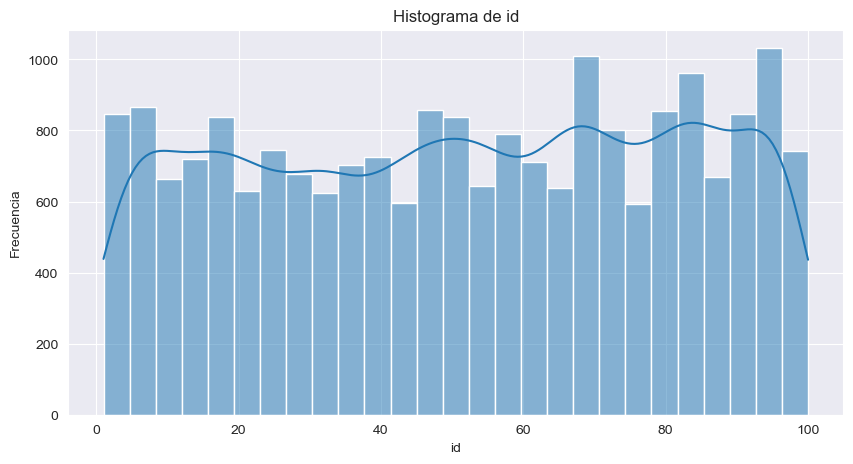

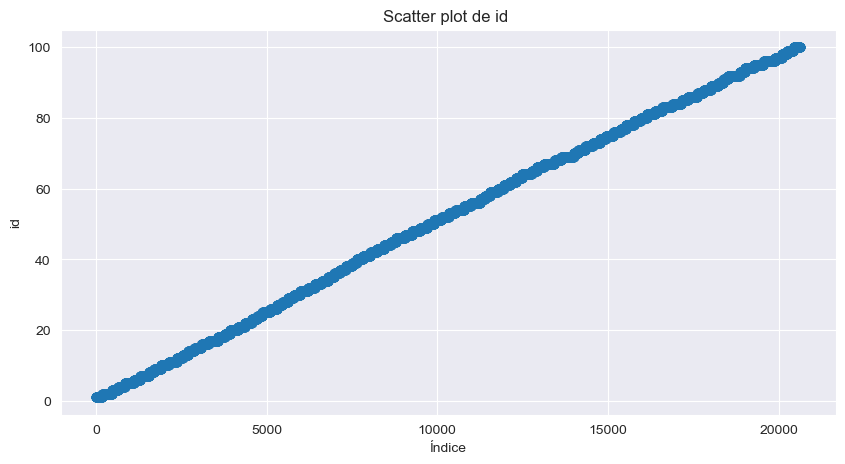

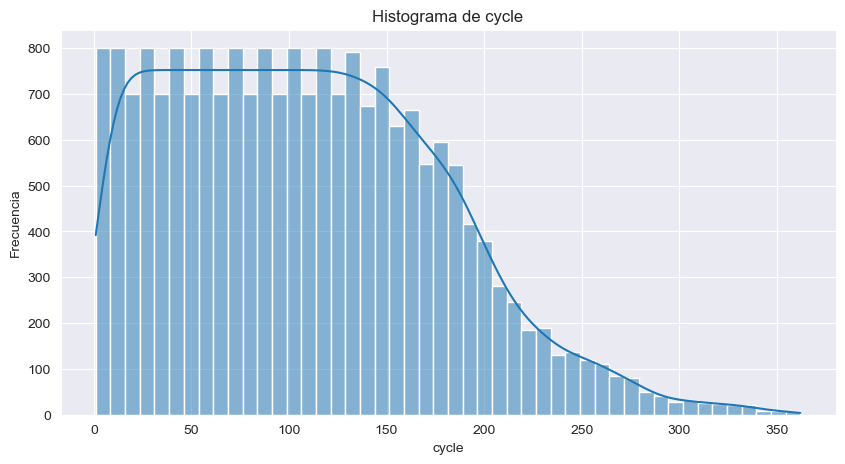

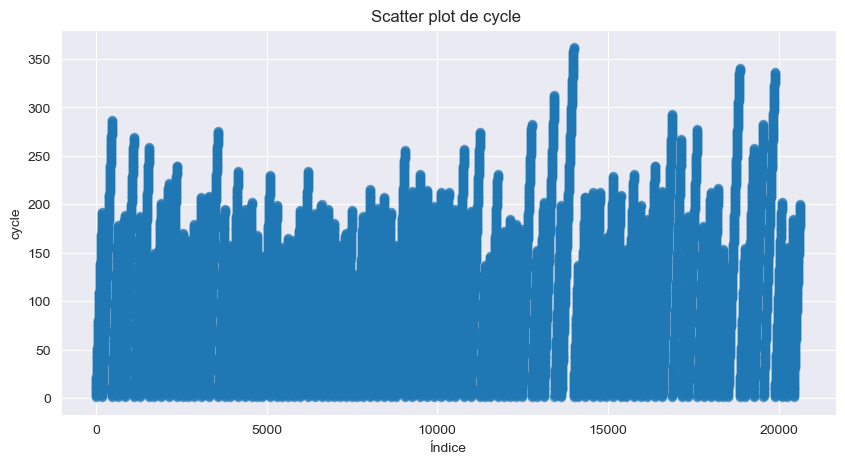

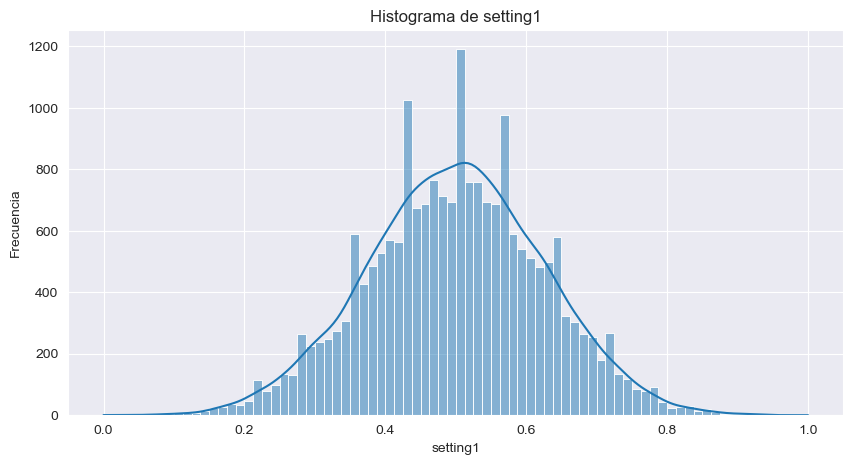

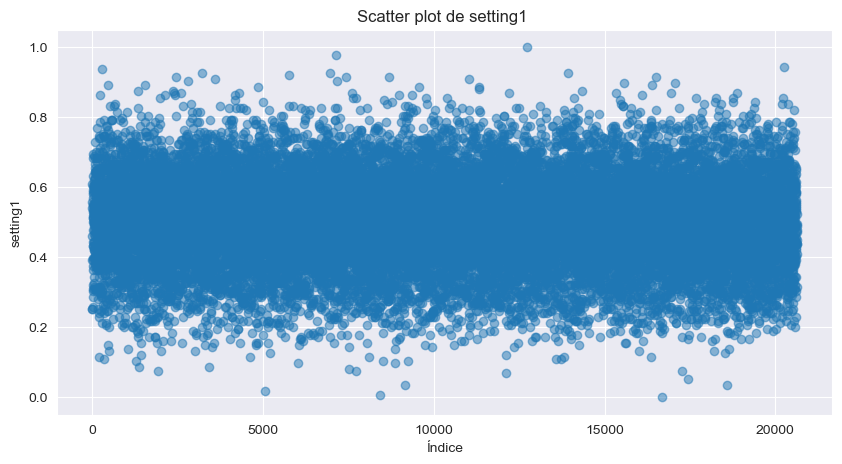

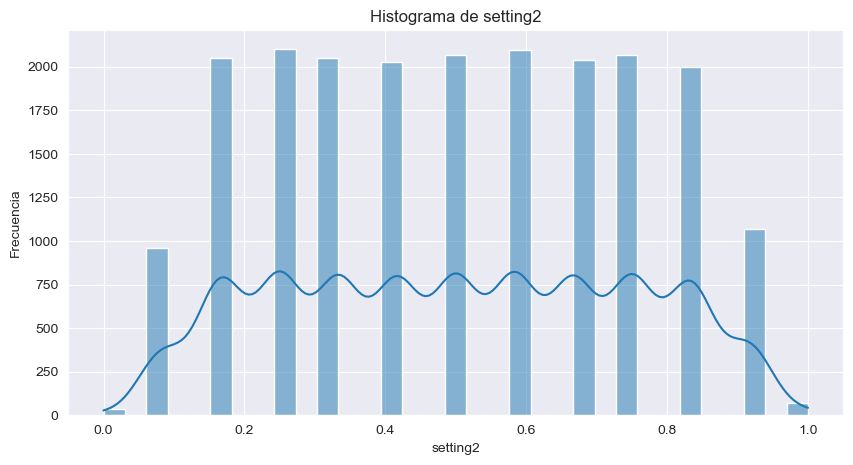

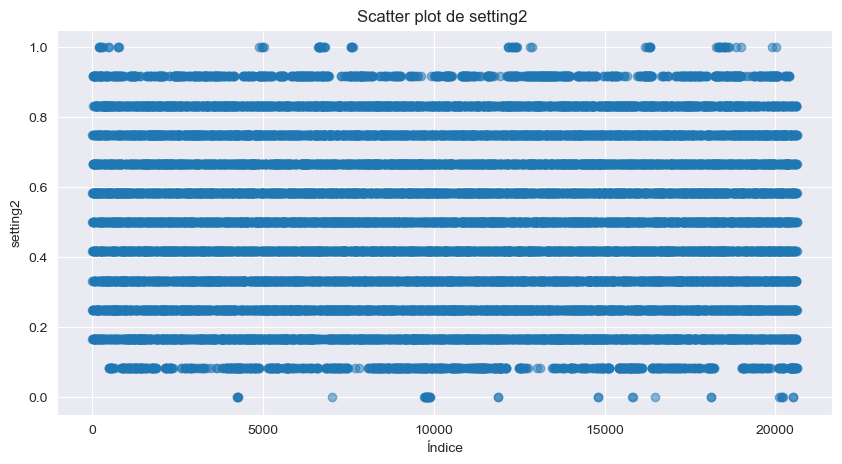

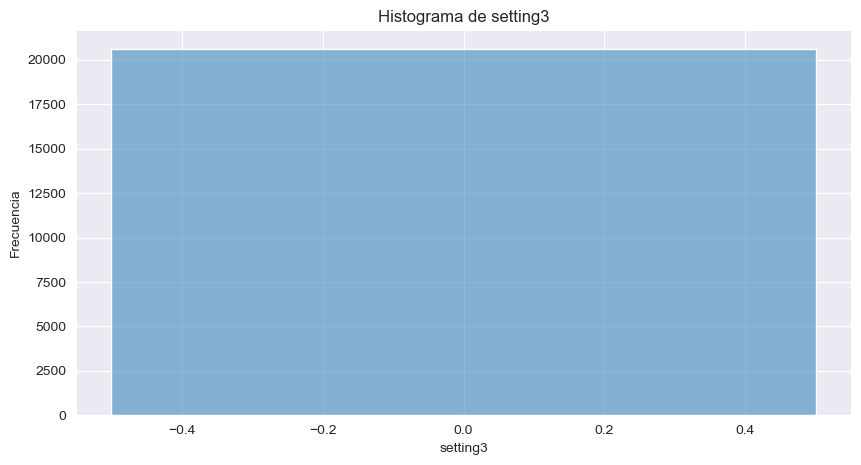

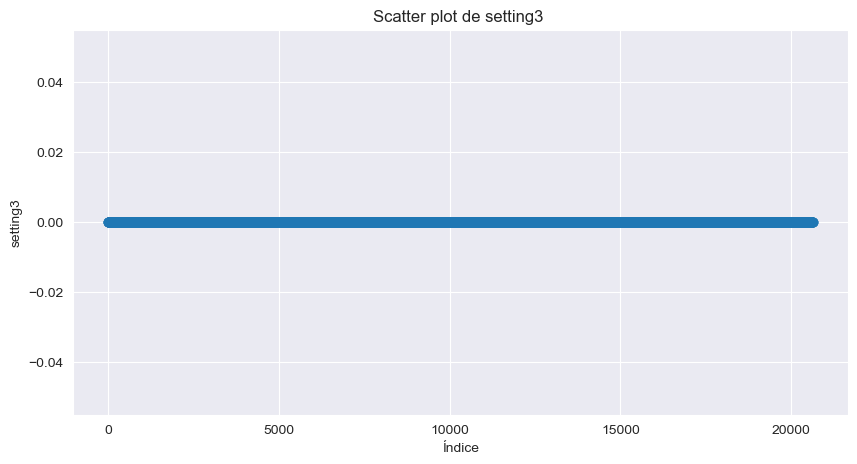

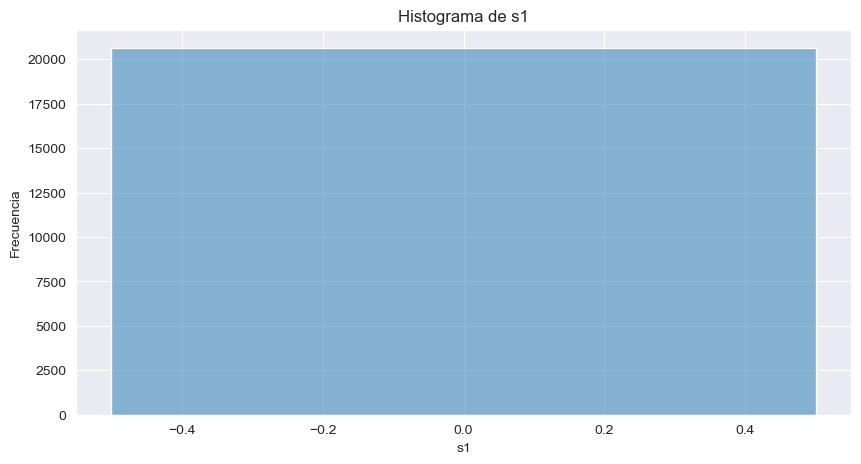

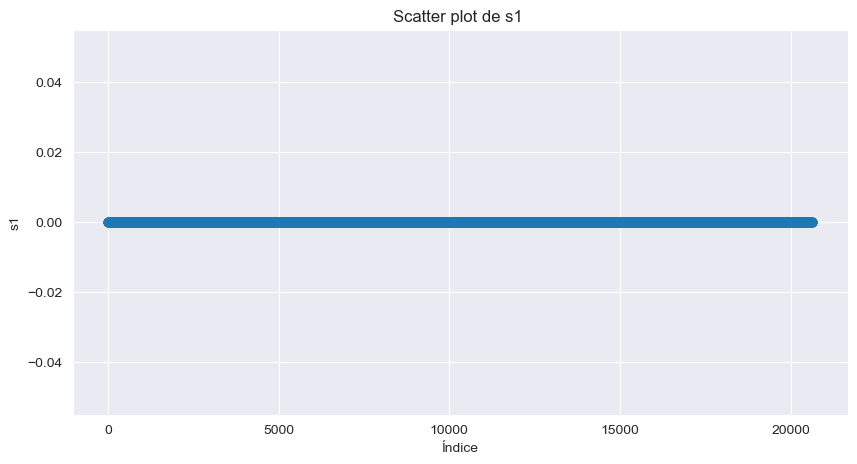

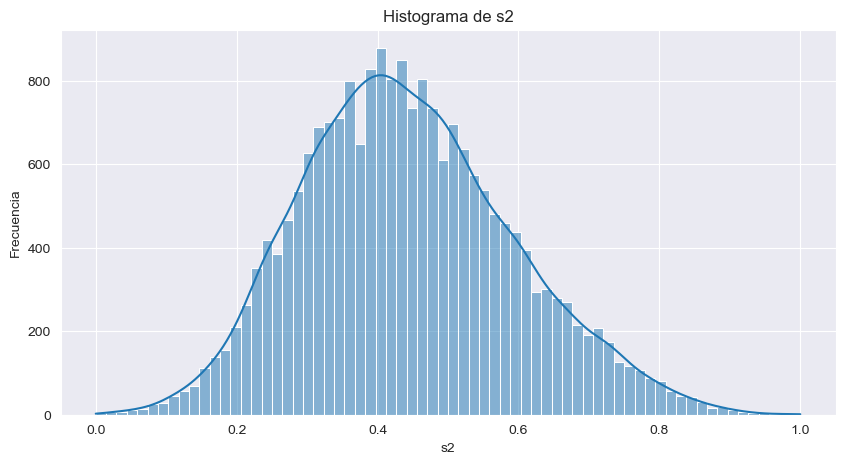

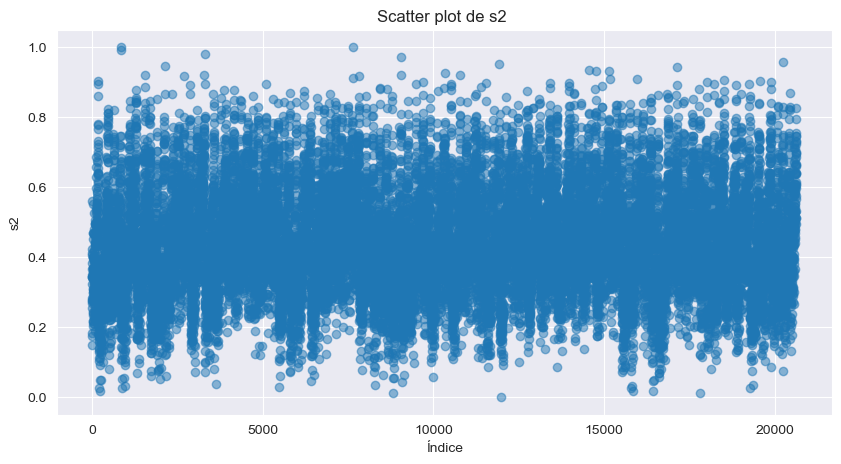

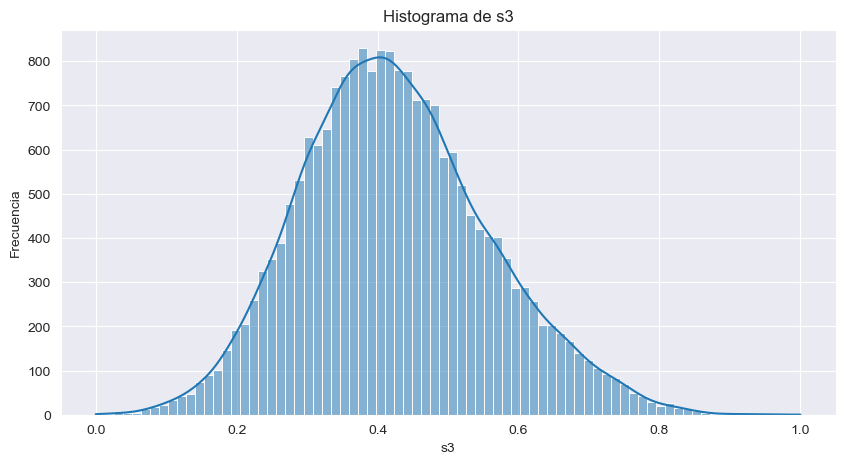

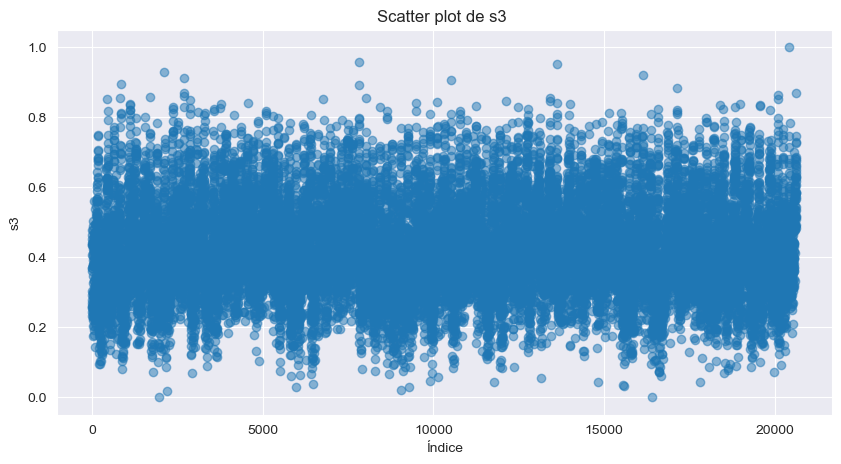

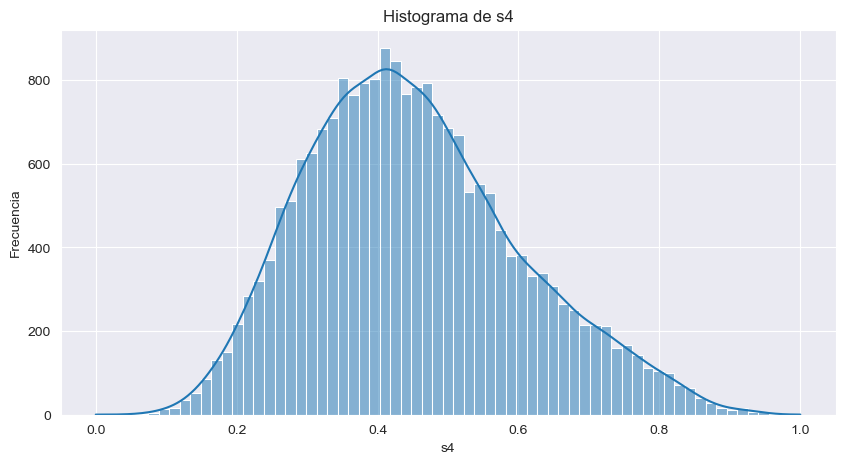

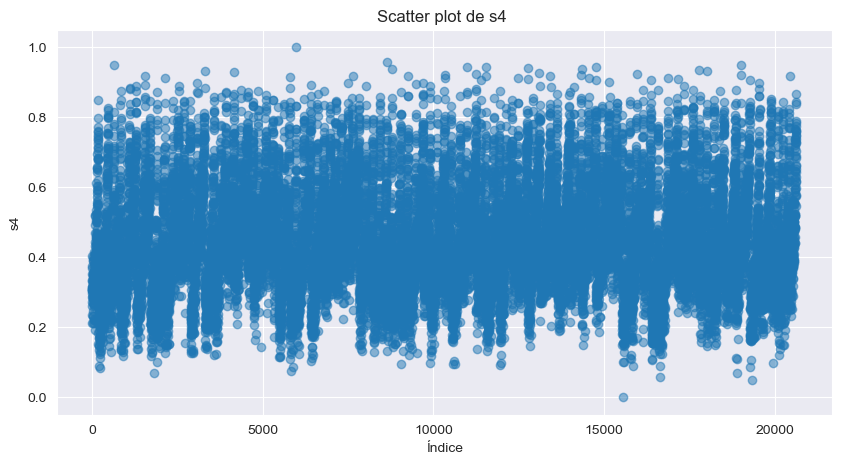

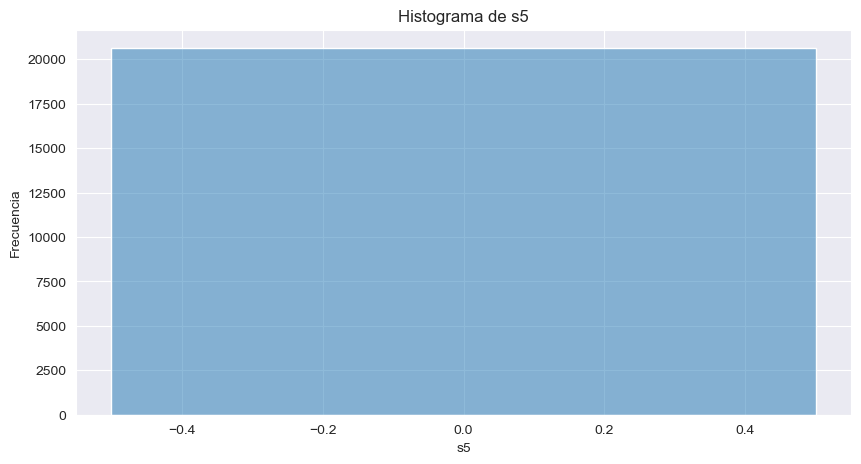

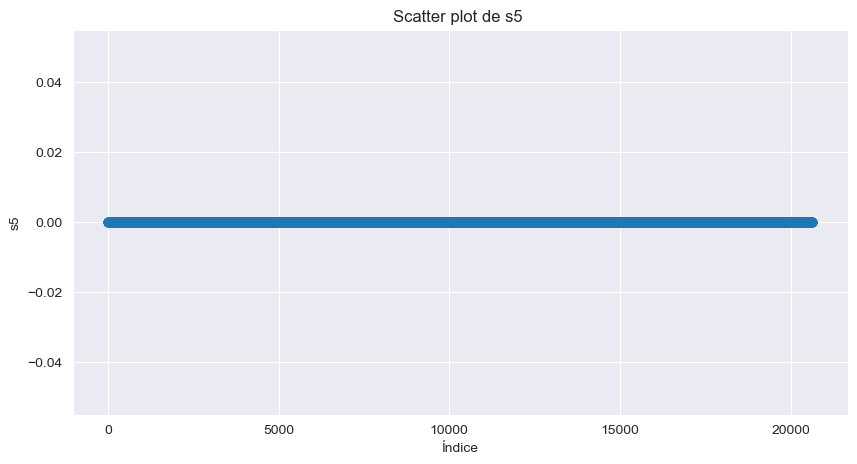

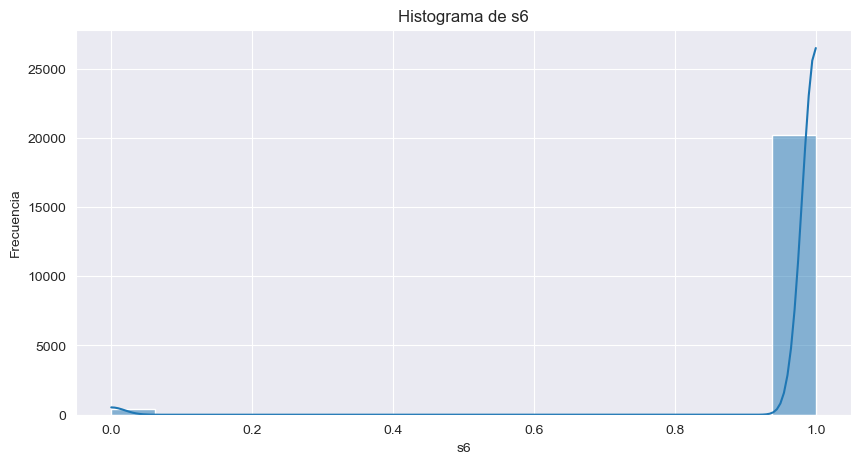

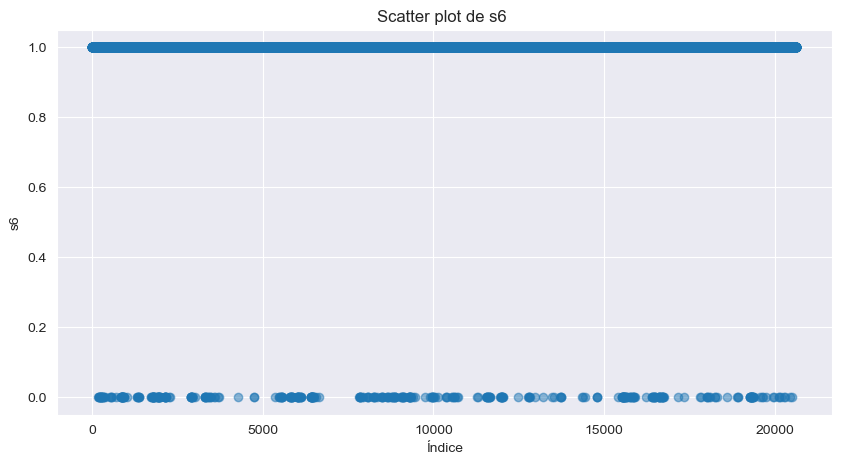

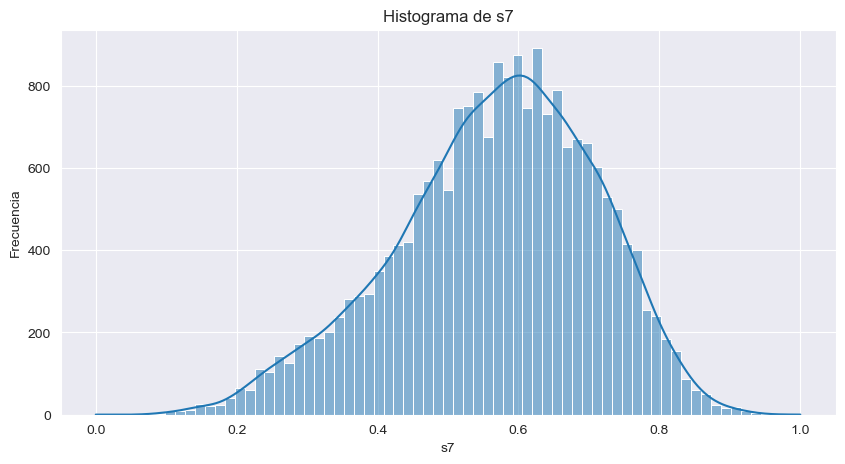

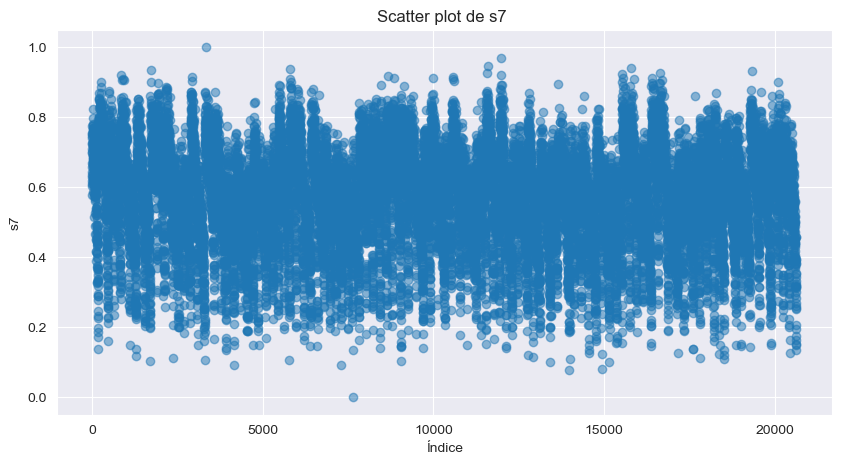

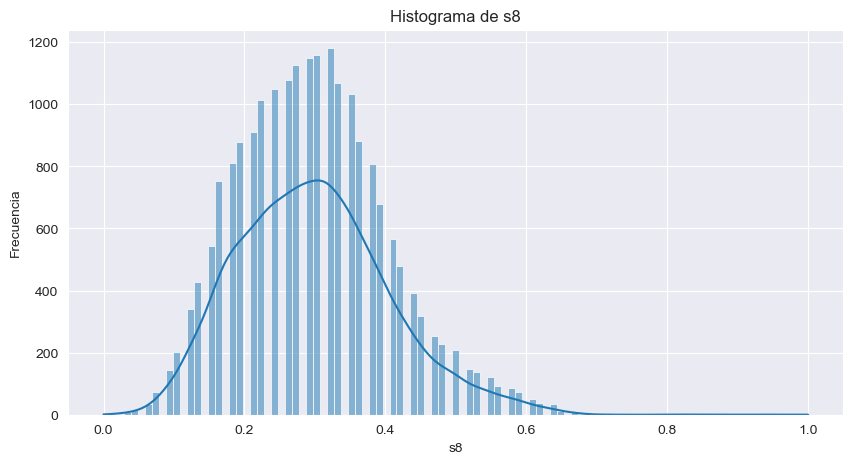

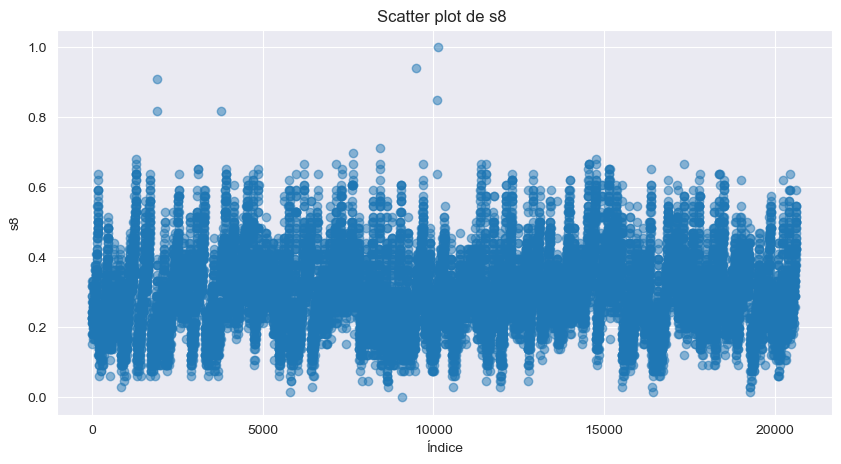

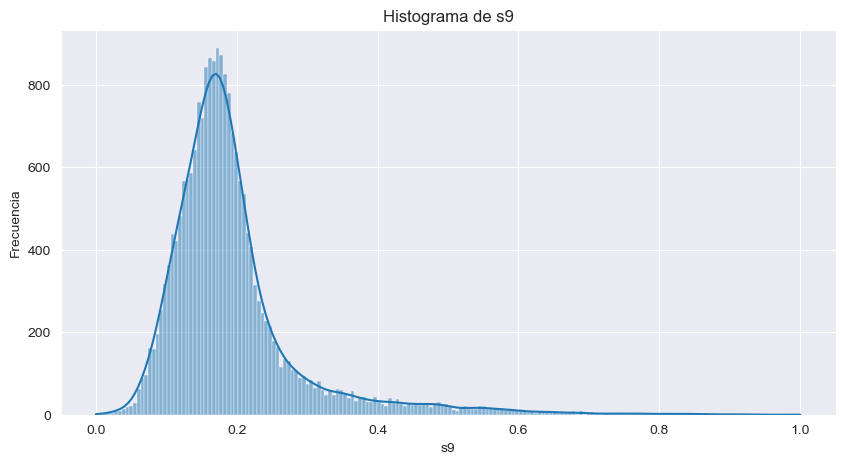

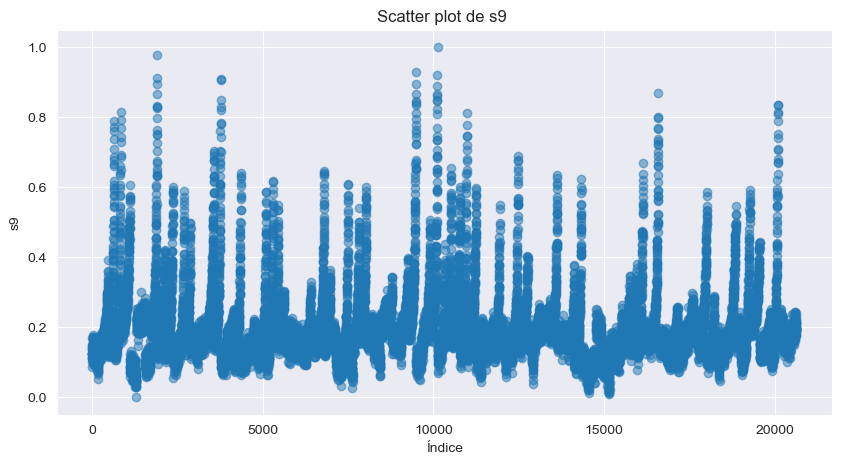

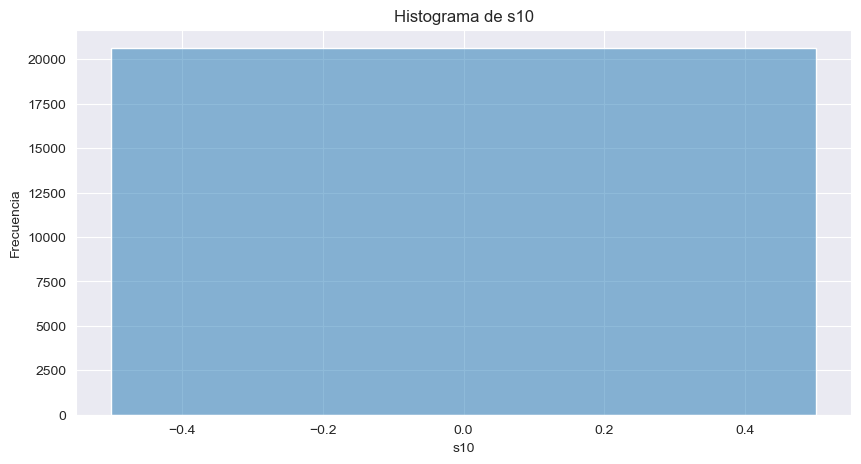

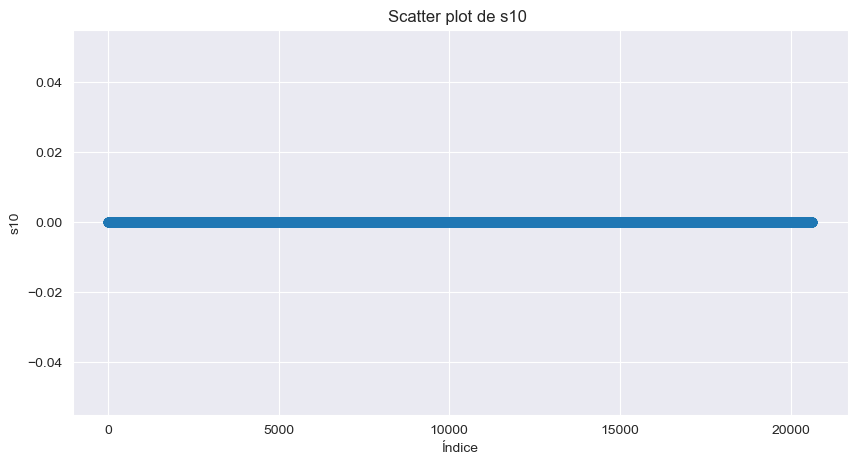

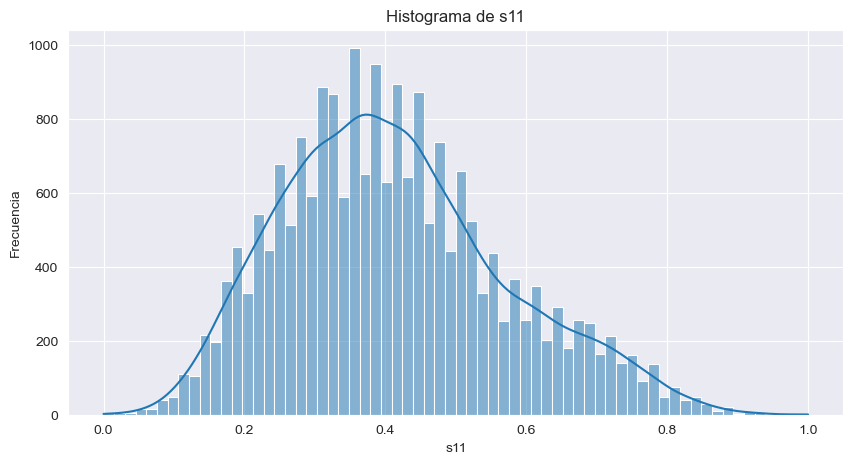

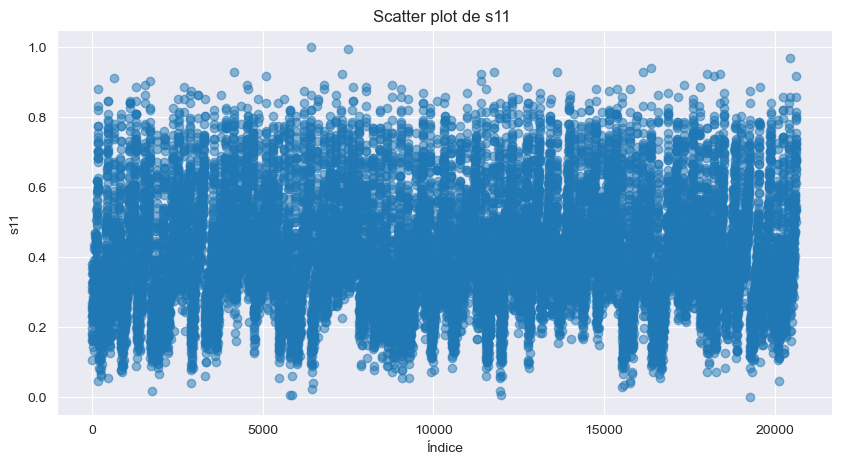

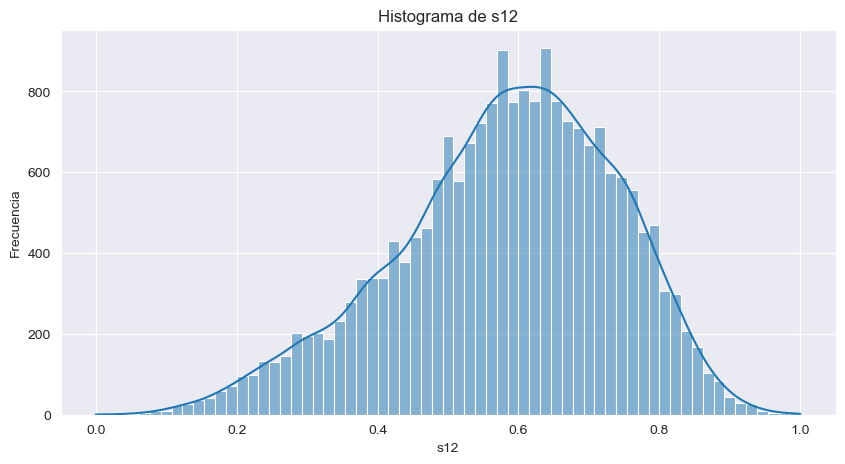

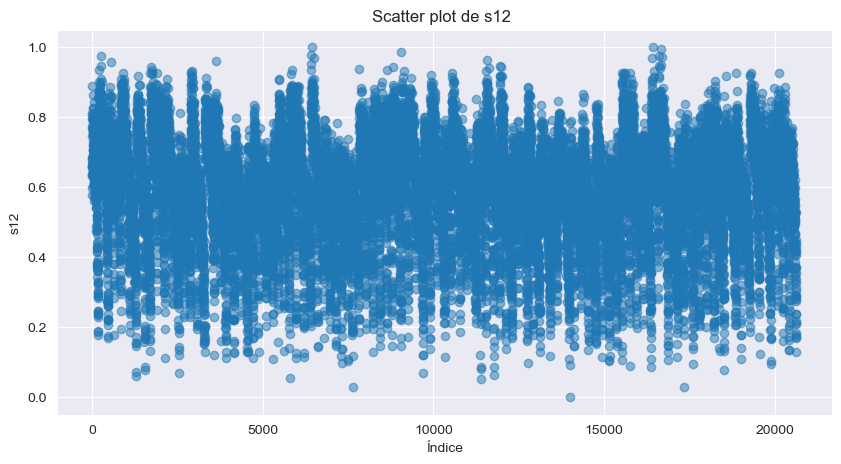

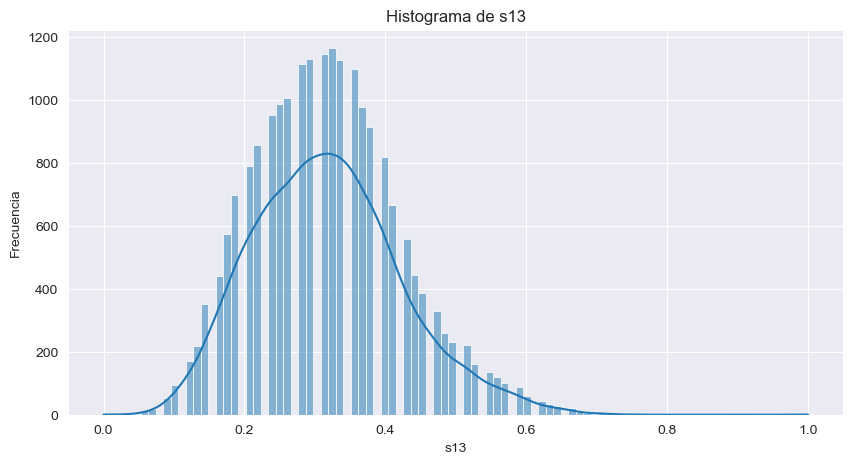

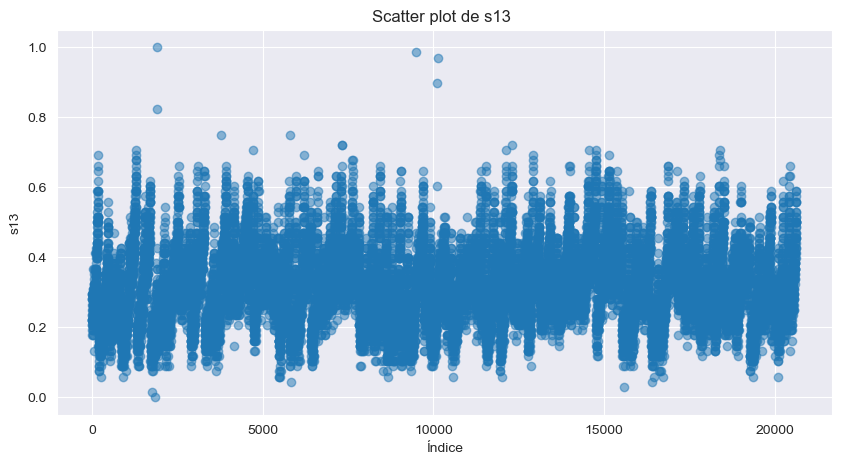

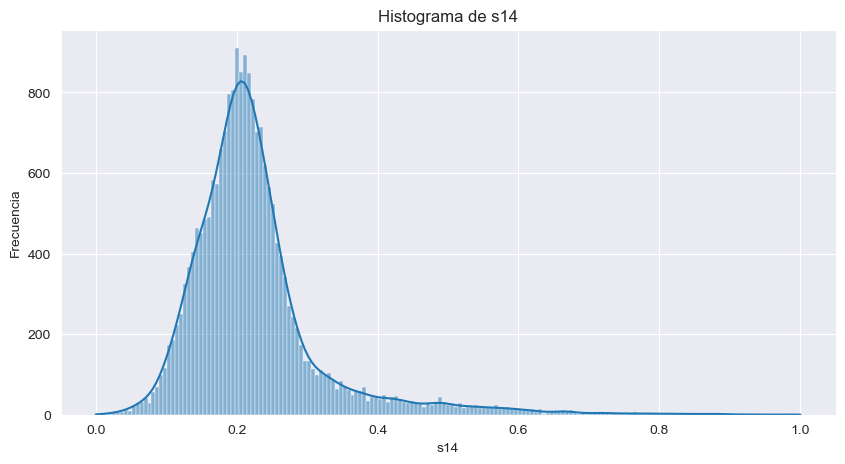

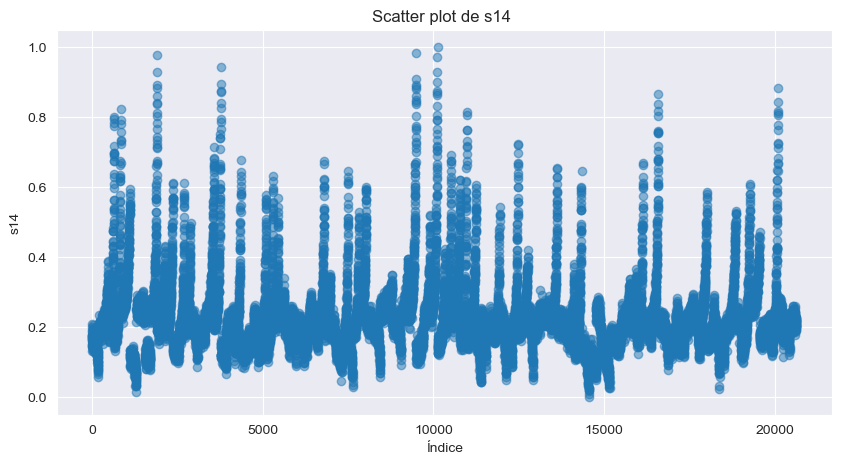

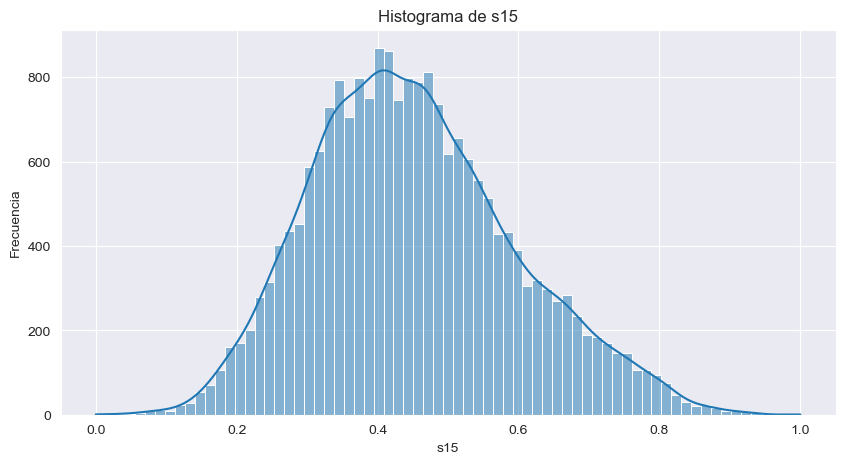

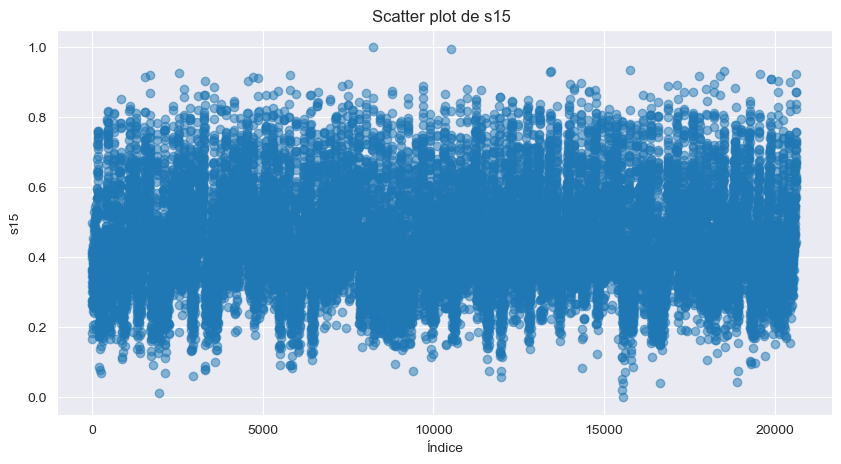

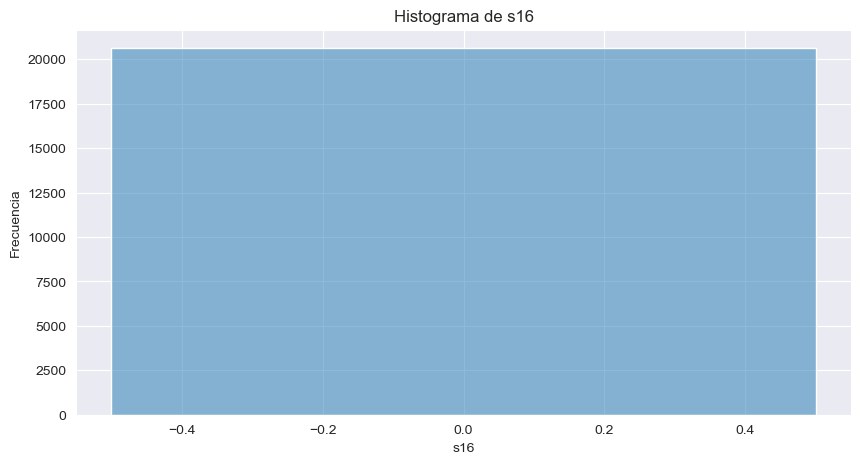

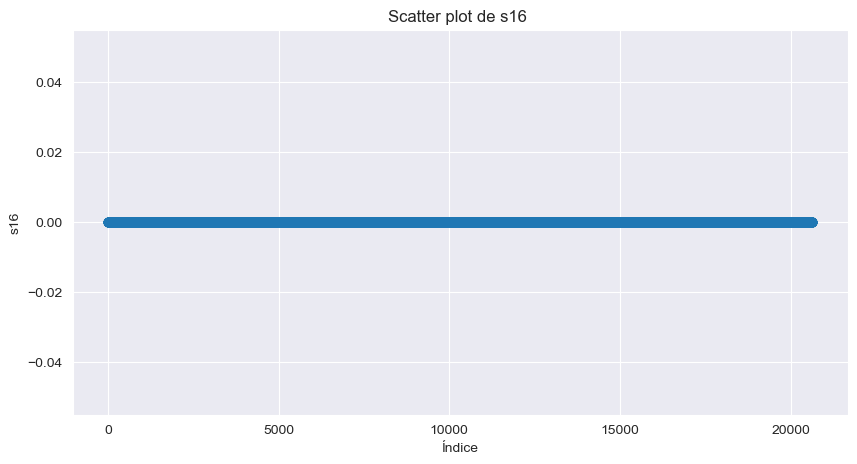

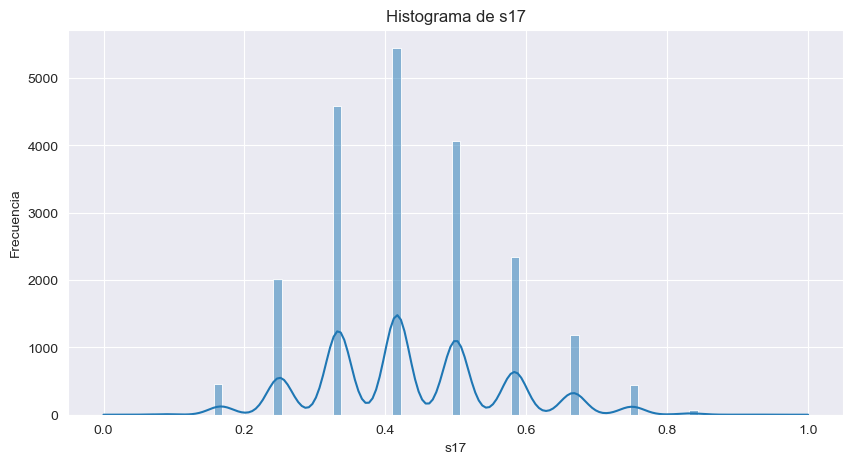

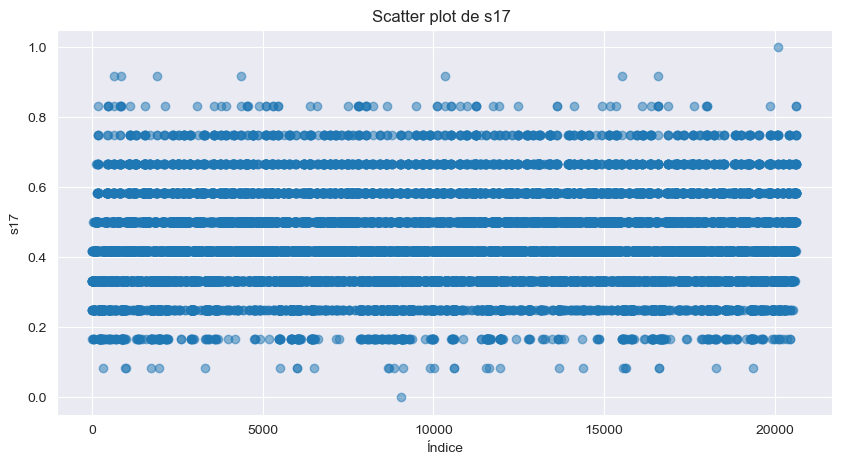

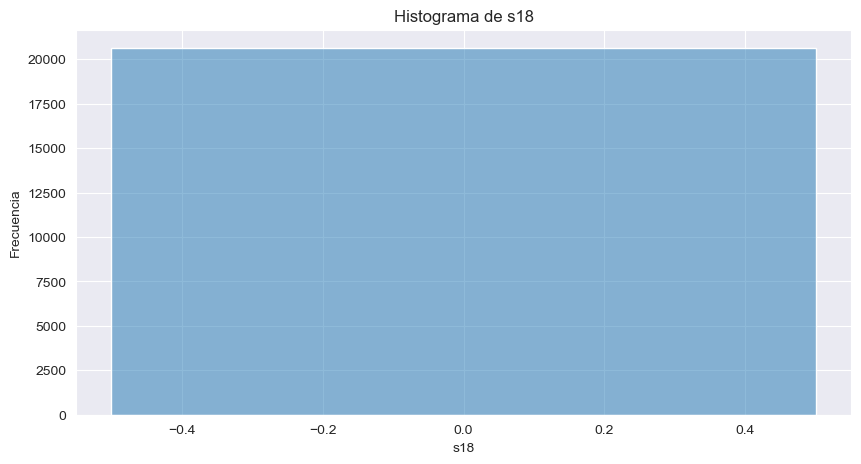

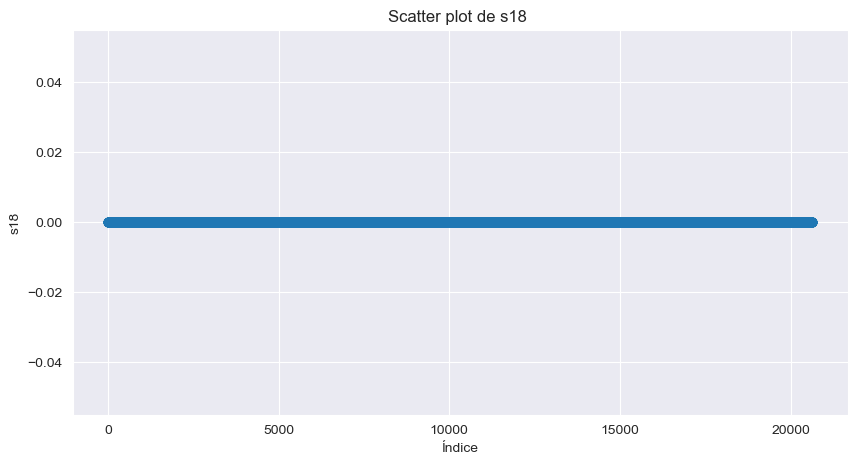

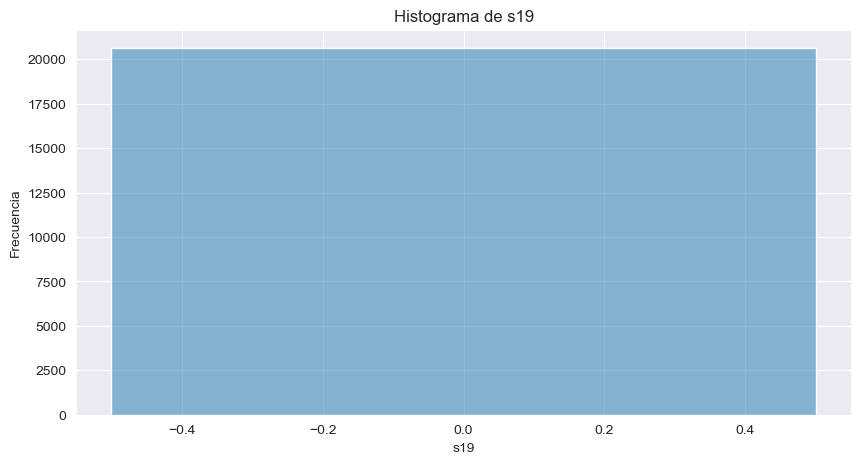

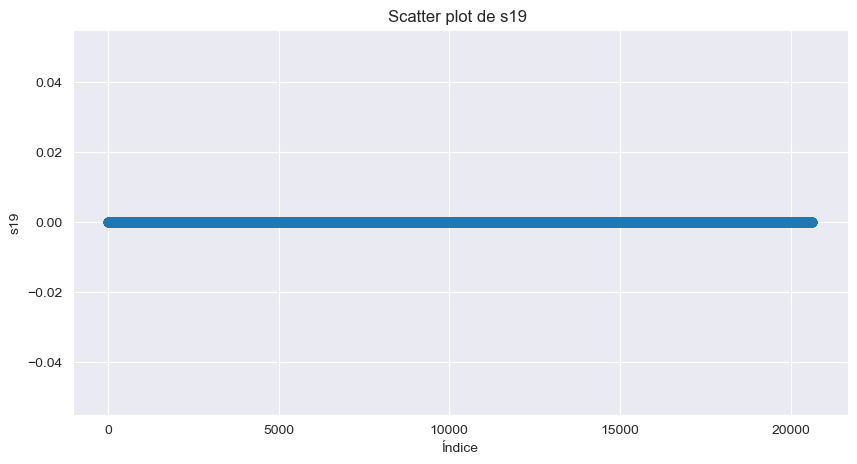

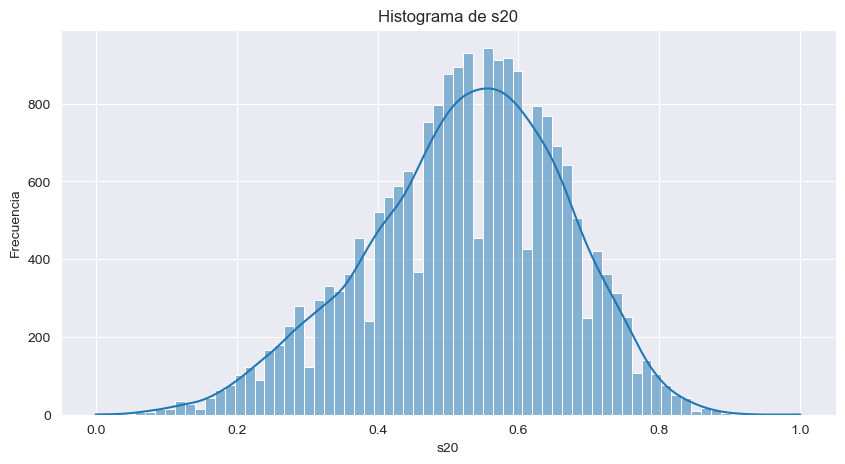

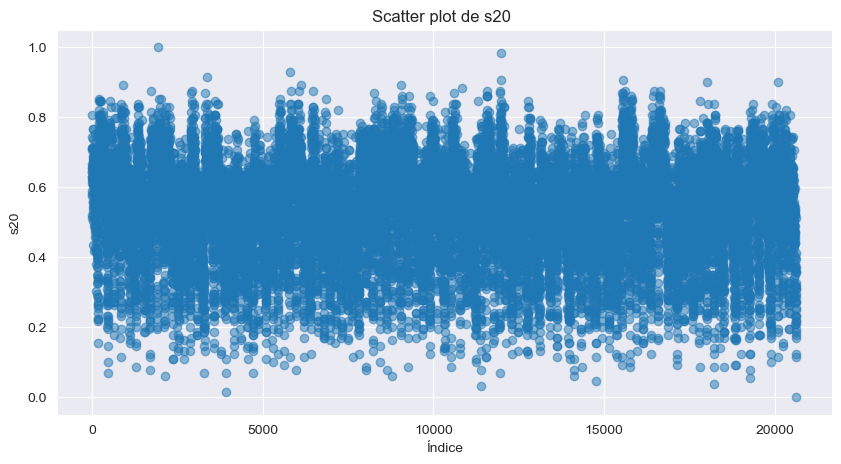

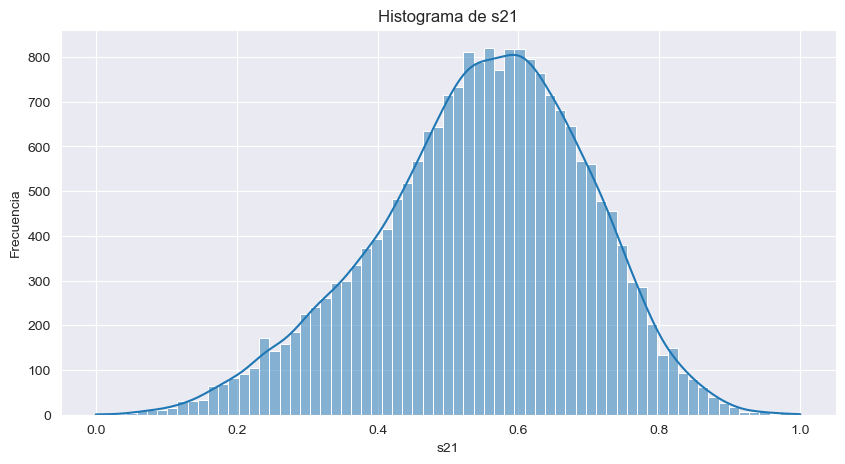

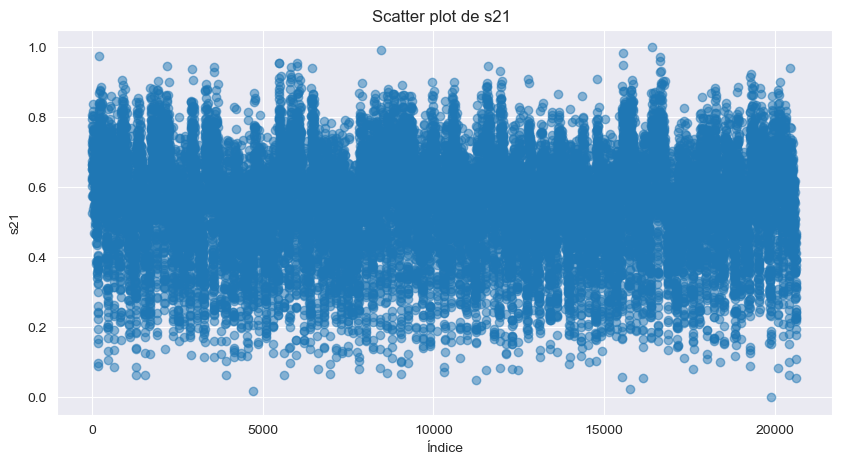

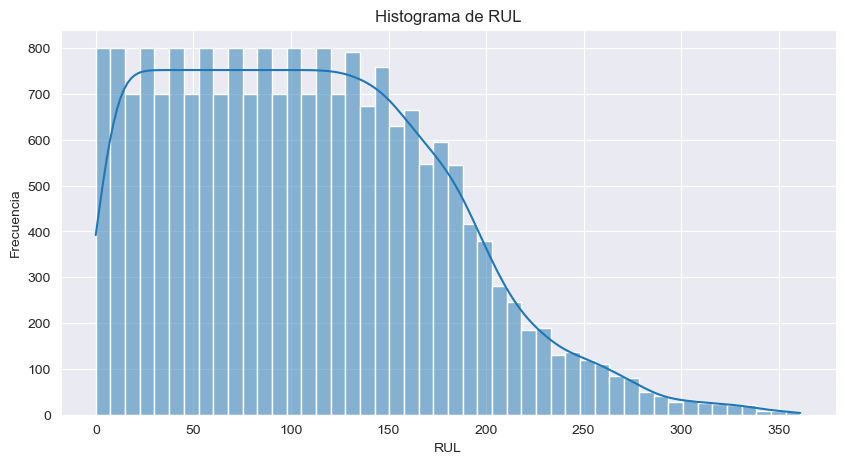

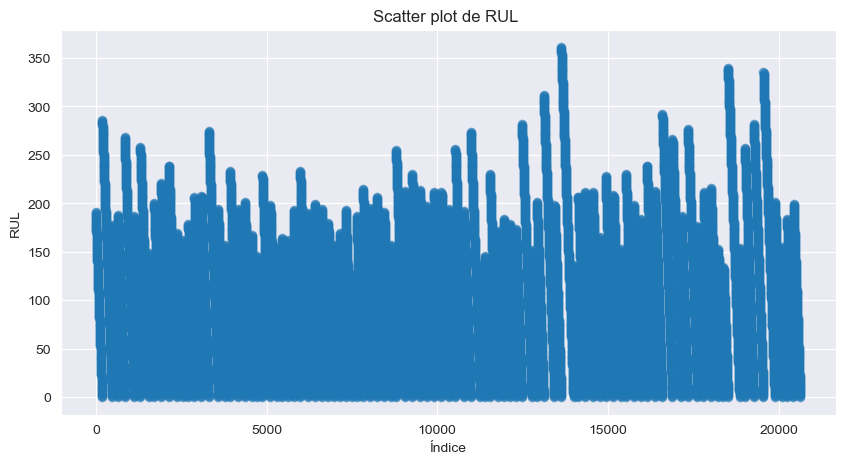

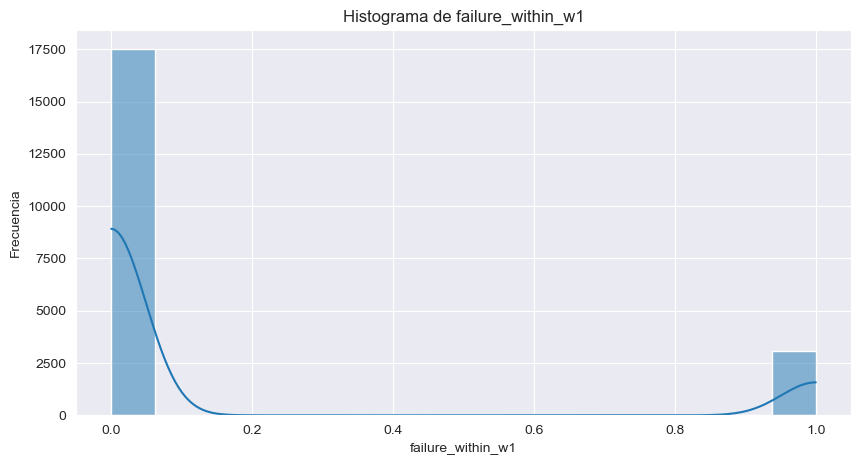

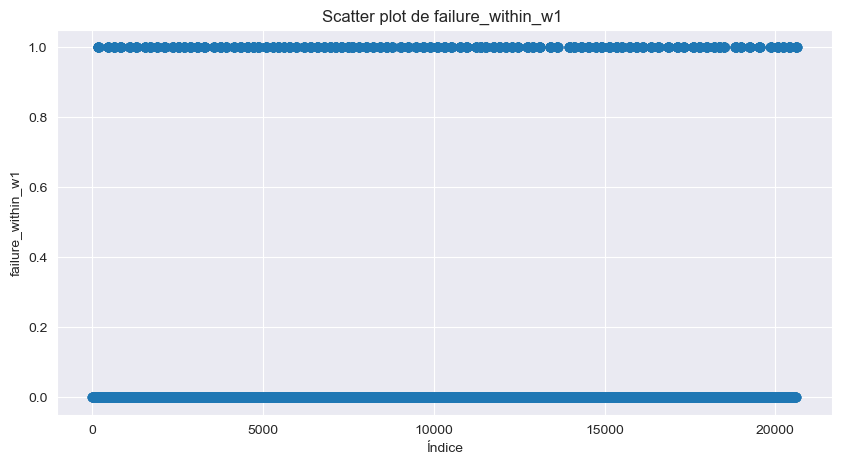

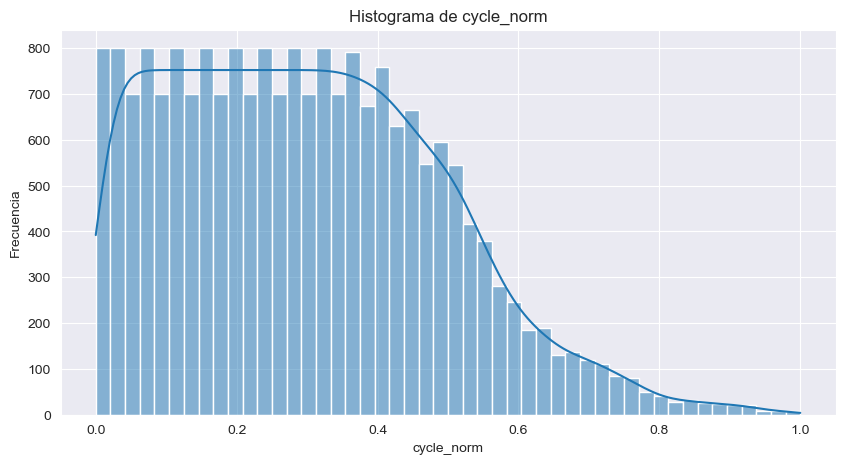

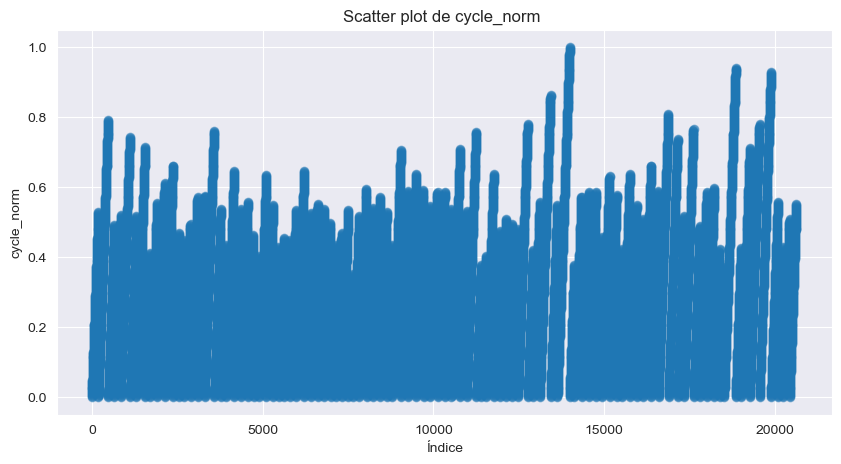

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Crear gráficos de histogramas y scatter plots
def plot_histograms_and_scatters(df):
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):  # Verifica si la columna es numérica
            
            # Histograma
            plt.figure(figsize=(10, 5))
            sns.histplot(df[column], kde=True)
            plt.title(f'Histograma de {column}')
            plt.xlabel(column)
            plt.ylabel('Frecuencia')
            plt.show()

            # Scatter plot de la columna 
            plt.figure(figsize=(10, 5))
            plt.scatter(df.index, df[column], alpha=0.5)
            plt.title(f'Scatter plot de {column} ')
            plt.xlabel('Índice')
            plt.ylabel(column)
            plt.show()
plot_histograms_and_scatters(train_df)


<Axes: >

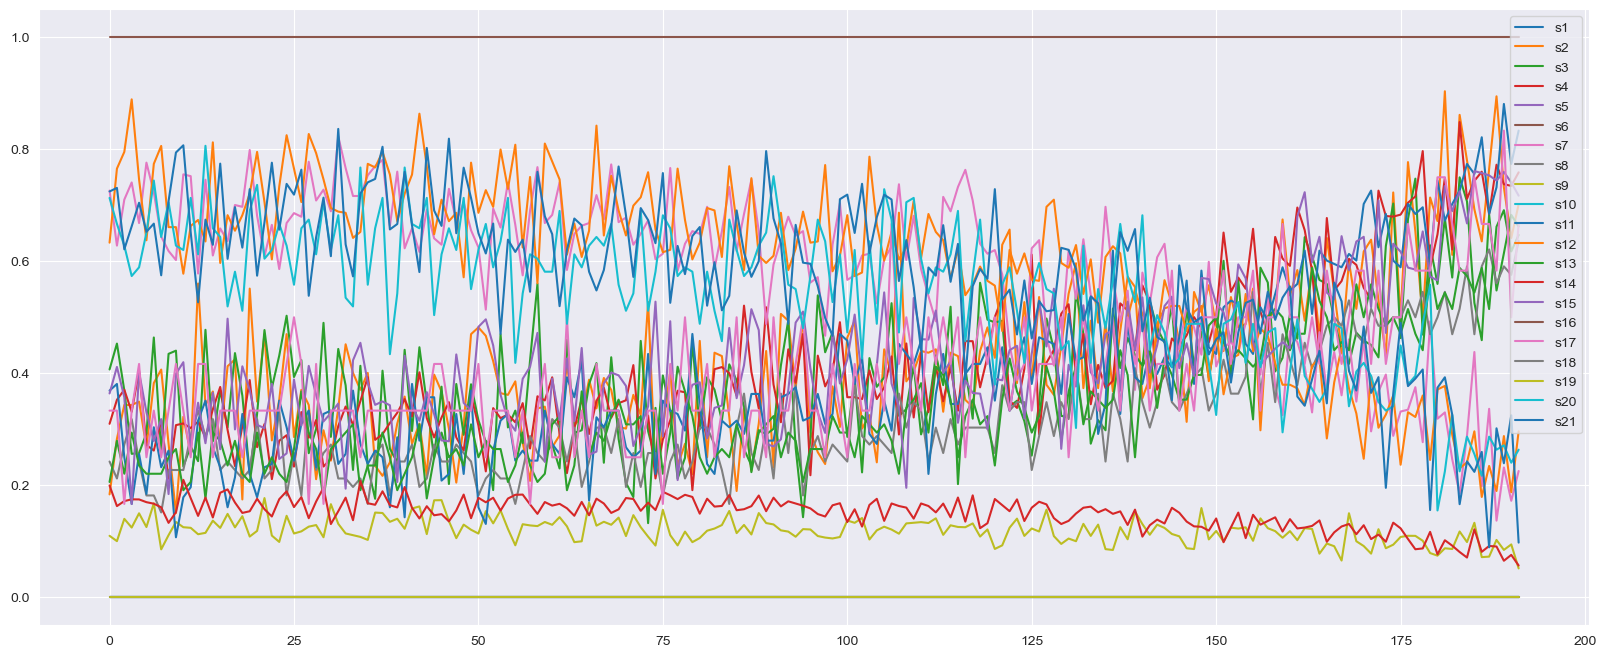

In [39]:
sensor_cols = cols_names[5:]
train_df[train_df.id==1][sensor_cols].plot(figsize=(20, 8))

# Idea el modelo

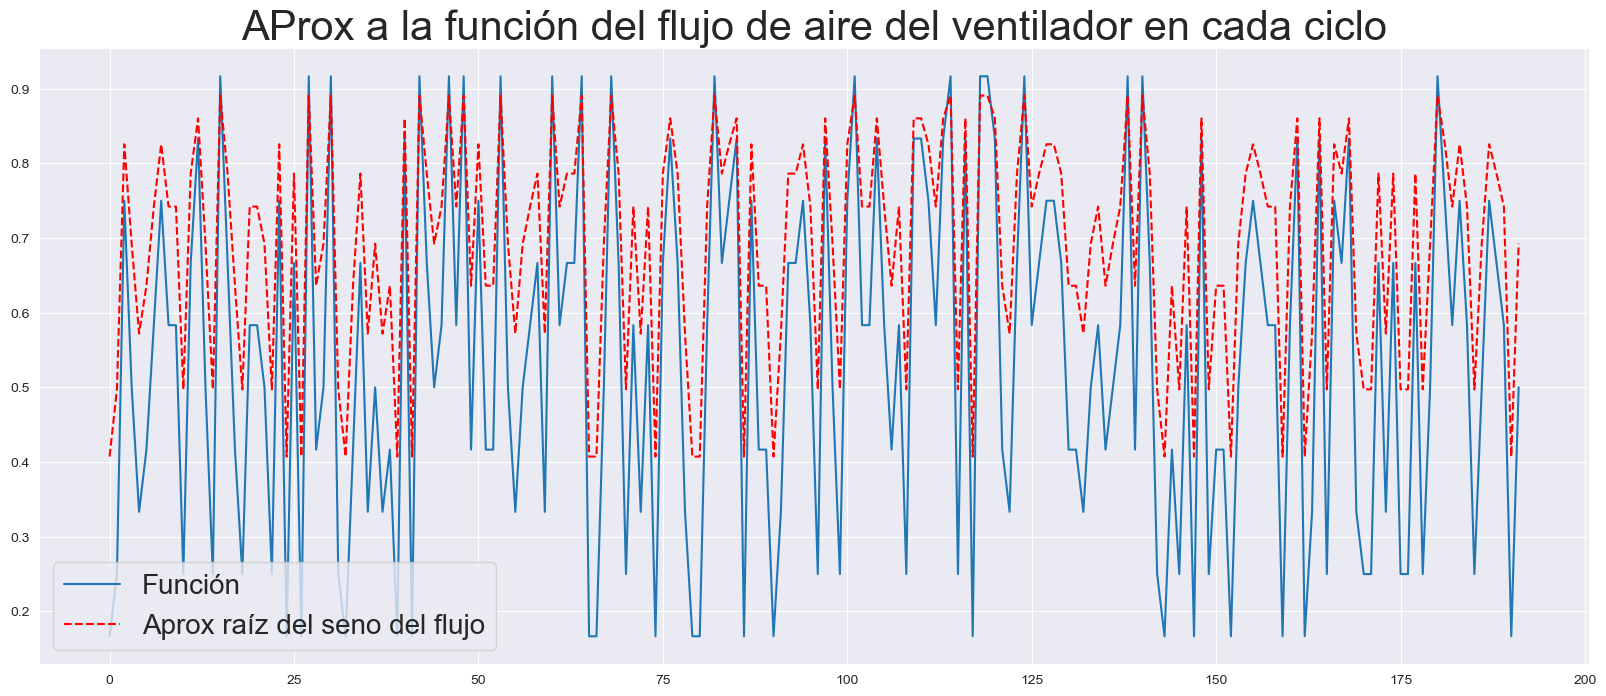

In [83]:
train_df[train_df.id==1]['setting2'].plot(figsize=(20, 8))
plt.title('AProx a la función del flujo de aire del ventilador en cada ciclo',size=30)
plt.plot(np.sqrt(np.sin(train_df[train_df.id==1]['setting2'])),color='r', linestyle="--")
plt.legend(['Función','Aprox raíz del seno del flujo'],fontsize=20)

# Implementando Epochs y logica del modelo

In [22]:

sequence_length = 50

In [23]:

def sequence_generator(feature_df, seq_length, seq_cols):
    feature_array = feature_df[seq_cols].values
    num_elements = feature_array.shape[0]
    
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield feature_array[start:stop, :]

In [24]:

seq_gen = (list(sequence_generator(train_df[train_df['id']==id], sequence_length, ["s2"])) 
           for id in train_df['id'].unique())
seq_set = np.concatenate(list(seq_gen)).astype(np.float32)
seq_set.shape

(15631, 50, 1)

In [25]:

def label_generator(label_df, seq_length, label):

    label_array = label_df[label].values
    num_elements = label_array.shape[0]
    
    return label_array[seq_length:num_elements, :]


In [26]:

label_gen = [label_generator(train_df[train_df['id']==id], sequence_length, ['failure_within_w1']) 
             for id in train_df['id'].unique()]
label_set = np.concatenate(label_gen).astype(np.float32)
label_set.shape

(15631, 1)

# Modelo Neuronal

### 25 Atributos

In [27]:
# tomar los atributos
sensor_cols = ['s' + str(i) for i in range(1,22)]
sequence_cols_25 = ['setting1', 'setting2', 'setting3', 'cycle_norm']
sequence_cols_25.extend(sensor_cols) 

In [28]:
seq_gen = (list(sequence_generator(train_df[train_df['id']==id], sequence_length, sequence_cols_25)) #We will take all the features (25).
           for id in train_df['id'].unique())
seq_set_f25 = np.concatenate(list(seq_gen)).astype(np.float32)

seq_set_f25.shape

(15631, 50, 25)

In [29]:
features_dim = seq_set_f25.shape[2] 
out_dim = label_set.shape[1]

print("Features dimension: ", features_dim)
print("Output dimension: ", out_dim)

RNN_fwd_2 = Sequential()


RNN_fwd_2.add(SimpleRNN(
         input_shape=(sequence_length, features_dim),
         units=5,
         return_sequences=True))
RNN_fwd_2.add(Dropout(0.2))

RNN_fwd_2.add(SimpleRNN(
          units=3,
          return_sequences=False))
RNN_fwd_2.add(Dropout(0.2))

RNN_fwd_2.add(Dense(units=out_dim, activation='sigmoid'))

# Compilar el modelo
RNN_fwd_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(RNN_fwd_2.summary())

RNN_fwd_2_path = 'RNN_fwd_2.h5'

Features dimension:  25
Output dimension:  1


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50, 5)             155       
                                                                 
 dropout (Dropout)           (None, 50, 5)             0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 3)                 27        
                                                                 
 dropout_1 (Dropout)         (None, 3)                 0         
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 186 (744.00 Byte)
Trainable params: 186 (744.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_____________________________________

In [30]:
import time
epochs = 200
batch_size = 200
start = time.time()

# Fit the network.
RNN_fwd_2_history = RNN_fwd_2.fit(seq_set_f25, label_set, epochs=epochs, batch_size=batch_size, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(RNN_fwd_2_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )
end = time.time()
print("Total time taken for training: ", "{:.2f}".format((end-start)), " secs")


Epoch 1/200


75/75 - 5s - loss: 0.6384 - accuracy: 0.6755 - val_loss: 0.5801 - val_accuracy: 0.8018 - 5s/epoch - 69ms/step
Epoch 2/200


C:\Users\Josue\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


75/75 - 3s - loss: 0.5593 - accuracy: 0.7965 - val_loss: 0.5176 - val_accuracy: 0.8018 - 3s/epoch - 35ms/step
Epoch 3/200
75/75 - 3s - loss: 0.4585 - accuracy: 0.8532 - val_loss: 0.4158 - val_accuracy: 0.8645 - 3s/epoch - 34ms/step
Epoch 4/200
75/75 - 2s - loss: 0.3754 - accuracy: 0.9021 - val_loss: 0.3592 - val_accuracy: 0.8836 - 2s/epoch - 33ms/step
Epoch 5/200
75/75 - 2s - loss: 0.3375 - accuracy: 0.9024 - val_loss: 0.3180 - val_accuracy: 0.8990 - 2s/epoch - 31ms/step
Epoch 6/200
75/75 - 3s - loss: 0.3009 - accuracy: 0.9153 - val_loss: 0.2945 - val_accuracy: 0.9015 - 3s/epoch - 37ms/step
Epoch 7/200
75/75 - 3s - loss: 0.2786 - accuracy: 0.9203 - val_loss: 0.2733 - val_accuracy: 0.9066 - 3s/epoch - 36ms/step
Epoch 8/200
75/75 - 3s - loss: 0.2632 - accuracy: 0.9231 - val_loss: 0.2687 - val_accuracy: 0.9028 - 3s/epoch - 34ms/step
Epoch 9/200
75/75 - 2s - loss: 0.2503 - accuracy: 0.9238 - val_loss: 0.2415 - val_accuracy: 0.9156 - 2s/epoch - 32ms/step
Epoch 10/200
75/75 - 2s - loss: 0.24

# Evaluar la exactitud del modelo

In [89]:
def plot_model_accuracy(model_name_history, width = 10, height = 10):

  fig_acc = plt.figure(figsize=(width, height))
  plt.plot(model_name_history.history['accuracy'])
  plt.plot(model_name_history.history['val_accuracy'])
  plt.title('Exactitud del Modelo')
  plt.ylabel('Exactitud')
  plt.xlabel('Epoch')
  plt.legend(['Set de Prueba', 'Set de verificación'], loc='upper left')
  plt.show()

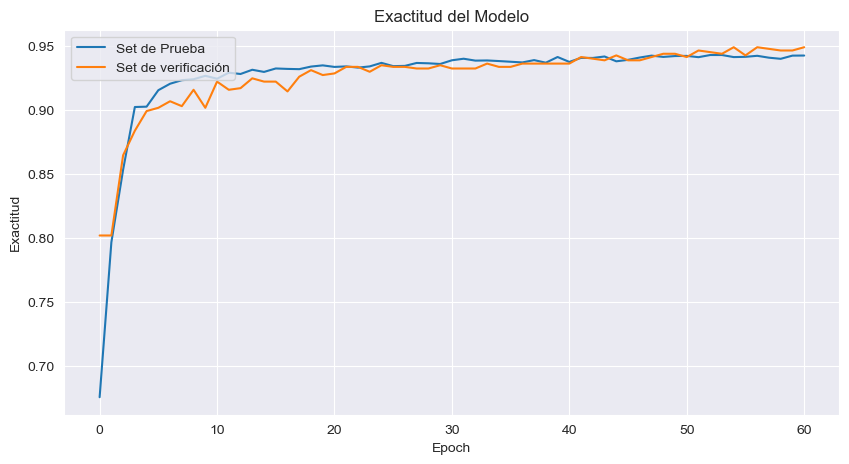

In [90]:
plot_model_accuracy(RNN_fwd_2_history, 10, 5)

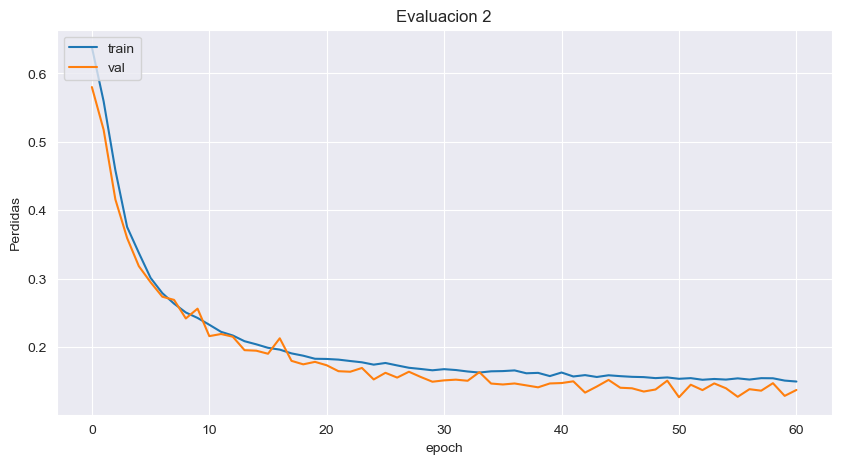

In [93]:
def plot_training_curve(model_name_history, width = 10, height = 10):
  fig_acc = plt.figure(figsize=(width, height))
  plt.plot(model_name_history.history['loss'])
  plt.plot(model_name_history.history['val_loss'])
  plt.title('Evaluacion 2')
  plt.ylabel('Perdidas')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
plot_training_curve(RNN_fwd_2_history,10,5)